Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [57]:
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [0]:
import numpy as np

# Wrangle the modeling data

# indicate_missing is a function that returns a boolean value if the inbound data = 'MISSING'
#   - helps in creating a "missing" column 
def indicate_missing(val):
  if val == 'MISSING':
    return True

  return False

# boolean_missing is a function converting the permit boolean column to categorical data 
def boolean_missing(val):
  if val == True:
    return 'TRUE'

  if val == False:
    return 'FALSE'

  return 'MISSING'

def wrangle(DF):
  X = DF.copy()

  # Replace near zero latitude values with zero
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # Replace zero values with nan so we can impute values downstream
  cols_with_zeroes = ['longitude',
                      'latitude',
                      'construction_year',
                      'gps_height',
                      'population']
  for col in cols_with_zeroes:
    X[col] = X[col].replace(0, np.nan)   # replace zeros with nans
    X[col+'_MISSING'] = X[col].isnull()  # create a missing indicator column

  # Create columns for month and year recorded data
  X['date_recorded']  = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
  X['year_recorded']  = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month

  # Create a column reflecting the number of years from construction to year recorded
  X['years']          = X['year_recorded'] - X['construction_year']
  X['years']          = X['years'].replace(0, np.nan)   # replace zeros with nans
  X['years_MISSING']  = X['years'].isnull() # create a missing years indicator column

  # Replace missing boolean data with categorical data reflecting that missing data
  cols_boolean_missing = ['public_meeting', 'permit']
  for col in cols_boolean_missing:
    X[col+'_CATEGORICAL']             = X[col].apply(boolean_missing)
    X[col+'_CATEGORICAL'+'_MISSING']  = X[col+'_CATEGORICAL'].apply(indicate_missing)

  # Replace missing categorical data with 'MISSING'
  cols_categorical_missing = ['funder', 'installer', 'scheme_name', 'scheme_management', 'subvillage']
  for col in cols_categorical_missing:
    X[col]            = X[col].replace(np.nan, 'MISSING')   # replace zeros with nans
    X[col+'_MISSING'] = X[col].apply(indicate_missing)

  # List columns to be dropped
  cols_drop = [
               'date_recorded',             # date_recorded - using year_recorded and month_recorded instead
               'quantity_group',            # duplicate column
               'payment_type',              # duplicate column
               'recorded_by',               # data collection process column (not predictive)
               'id',                        # data collection process column (not predictive)
               'permit',                    # replaced by categorical column: permit_string
               'num_private',               # 98% zeroes, unclear the purpose of this dat
               'construction_year',         # use 'years' as a proxy
               'construction_year_MISSING', # use 'years_MISSING' as a proxy
               'amount_tsh']                # highly skewed data
  # Also drop the columns we processed due to missing values
  cols_drop.extend(cols_boolean_missing)

  # Drop undesired columns
  X = X.drop(columns=cols_drop)

  return X

In [0]:
# Split train into train and val datasets
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

In [0]:
# Apply the wrangle operation to the training, validation, and test datasets
df_train = wrangle(train)
df_val   = wrangle(val)
df_test  = wrangle(test)

In [0]:
from pandas_profiling import ProfileReport

# Generate and download profile reports for train, validate, and test datasets
ProfileReport(df_train, minimal=True).to_file(output_file="tanzania_train_output.html")
ProfileReport(df_val,   minimal=True).to_file(output_file="tanzania_val_output.html")
ProfileReport(df_test,  minimal=True).to_file(output_file="tanzania_test_output.html")

In [0]:
# Construct train, validate, and test dataframes for modeling
# The status_group column is the target
target = 'status_group'

X_train = df_train.drop(columns=target)
y_train = df_train[target]
X_val   = df_val.drop(columns=target)
y_val   = df_val[target]
X_test  = df_test

In [70]:
print(X_train.shape, X_val.shape)

(47520, 47) (11880, 47)


In [0]:
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [74]:
%%time
# Construct a modeling pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit the pipeline to the training dataset
pipeline.fit(X_train, y_train)

# Score on the validation dataset
print(f'Validation Accuracy: {round(pipeline.score(X_val, y_val), 5)}')

Validation Accuracy: 0.80926
CPU times: user 18.3 s, sys: 83.7 ms, total: 18.4 s
Wall time: 10.1 s


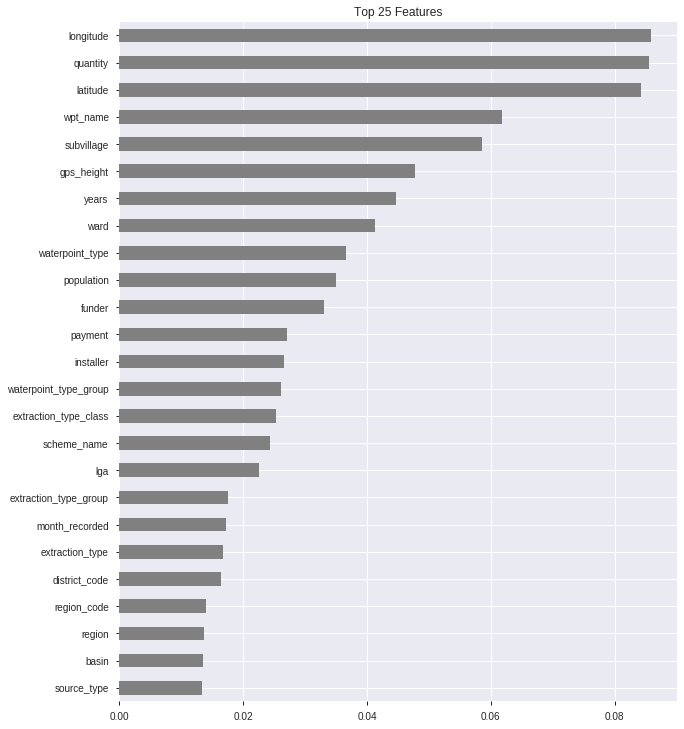

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
encoder = pipeline.named_steps['ordinalencoder']
encoded_df = encoder.transform(X_train)

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 25
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# Generate model predictions with the testing dataset
y_test_pred = pipeline.predict(X_test)

In [0]:
# Construct dataframe housing the Kaggle submission dataset
tmp_dict = {'id': list(test['id']), 'status_group': list(y_test_pred)}
df_submission = pd.DataFrame(tmp_dict)

In [0]:
# Create submission csv (download and submit to Kaggle)
df_submission.to_csv("submission_dfa.csv", index=False)